# Production Technology

The dataset contains `N = 441` firms observed over `T = 12` years, 1968-1979. There variables are: 
* `lcap`: Log of capital stock, $k_{it}$ 
* `lemp`: log of employment, $\ell_{it}$ 
* `ldsa`: log of deflated sales, $y_{it}$
* `year`: the calendar year of the observation, `year` $ = 1968, ..., 1979$, 
* `firmid`: anonymized indicator variable for the firm, $i = 1, ..., N$, with $N=441$. 

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import seaborn as sns
import matplotlib.pyplot as plt
import LinearModelsPS2_post as lm
import scipy
from tabulate import tabulate
from scipy.stats import chi2

In [14]:
# Read data
dat = pd.read_csv('firms.csv')

dat.describe()

,firmid,year,lcap,lemp,ldsa
count,5292.000000,5292.000000,5.292000e+03,5.292000e+03,5.292000e+03
mean,221.000000,1973.500000,-7.125472e-09,-1.252834e-08,4.695767e-09
std,127.317437,3.452379,1.310973e+00,1.180122e+00,1.232499e+00
min,1.000000,1968.000000,-3.864950e+00,-3.382780e+00,-3.551540e+00
25%,111.000000,1970.750000,-9.083267e-01,-7.855270e-01,-9.279720e-01
50%,221.000000,1973.500000,-1.180615e-01,-1.137295e-01,-1.029710e-01
75%,331.000000,1976.250000,9.063340e-01,7.930060e-01,8.562296e-01
max,441.000000,1979.000000,4.103687e+00,3.371332e+00,3.913391e+00


In [15]:
# Check if the panel is balanced
N = dat.firmid.nunique()
T = dat.year.nunique()
assert dat.shape[0] == N * T, f'Error: data is not a balanced panel'

# Convert data to panel structure
dat = dat.set_index(['firmid', 'year'])

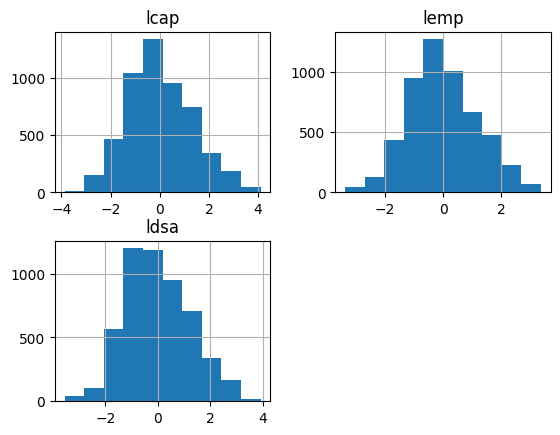

In [16]:
# Visualiseringer
dat[['lcap', 'lemp', 'ldsa']].hist()
plt.show()

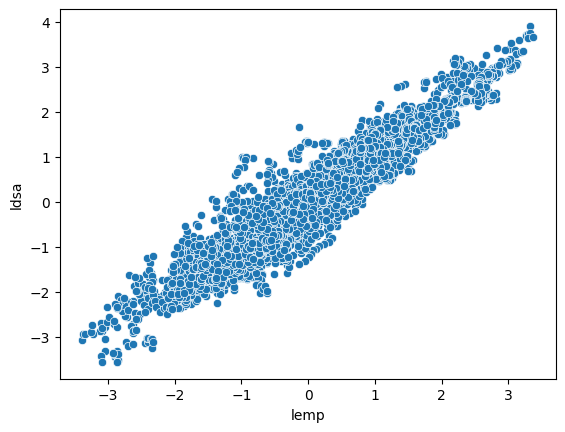

In [17]:
sns.scatterplot(x='lemp', y='ldsa', data=dat)
plt.show()

**$\textcolor{red}{HJÆLPE}$ $\textcolor{red}{KODER}$**

In [ ]:
# Indlæs data
dat = pd.read_csv('firms.csv')

dat = dat[dat["year"] < 1971]
print(dat)

      firmid  year      lcap      lemp      ldsa
0          1  1968  0.998602 -0.242185  0.349053
1          1  1969  0.925214 -0.241278  0.312492
2          1  1970  0.879616 -0.265134  0.347566
12         2  1968 -0.069588 -0.323021 -0.945831
13         2  1969 -0.056724 -0.358177 -1.143830
...      ...   ...       ...       ...       ...
5269     440  1969 -0.228757  0.031242 -0.246864
5270     440  1970 -0.038354  0.062158 -0.345710
5280     441  1968 -1.618390 -1.944210 -2.032340
5281     441  1969 -1.635030 -1.856580 -2.011210
5282     441  1970 -1.454890 -1.538940 -1.371550

[1323 rows x 5 columns]


In [ ]:
dat.sample(5) 

,firmid,year,lcap,lemp,ldsa
2808,235,1968,-2.417230,-2.405200,-2.384830
1872,157,1968,-1.320150,-1.167060,-1.276300
614,52,1970,0.771141,0.410786,-0.140076
5114,427,1970,-0.582111,-0.456240,-0.652100
1201,101,1969,-0.234161,0.043742,-0.339365


In [ ]:
dat.year.unique()

array([1968, 1969, 1970])

# Descriptives

In [ ]:
dat.describe()

,firmid,year,lcap,lemp,ldsa
count,1323.000000,1323.000000,1.323000e+03,1.323000e+03,1.323000e+03
mean,221.000000,1969.000000,-3.432577e-08,5.291005e-09,3.253968e-08
std,127.353547,0.816805,1.367661e+00,1.212370e+00,1.238870e+00
min,1.000000,1968.000000,-3.864950e+00,-3.108660e+00,-3.433130e+00
25%,111.000000,1968.000000,-9.629080e-01,-8.435585e-01,-9.082370e-01
50%,221.000000,1969.000000,-1.016350e-01,-1.141760e-01,-1.142770e-01
75%,331.000000,1970.000000,9.708763e-01,8.067791e-01,8.648864e-01
max,441.000000,1970.000000,3.993508e+00,3.187258e+00,3.418170e+00


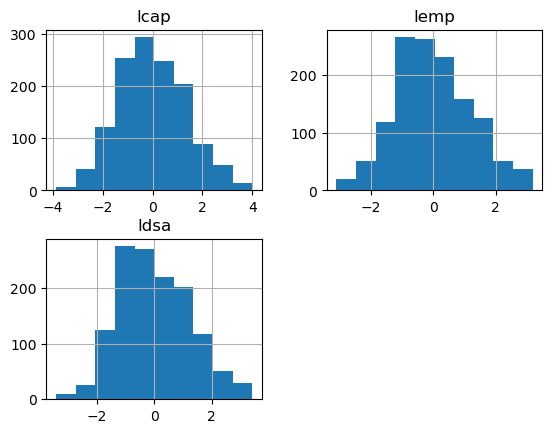

In [ ]:
dat[['lcap','lemp','ldsa']].hist();

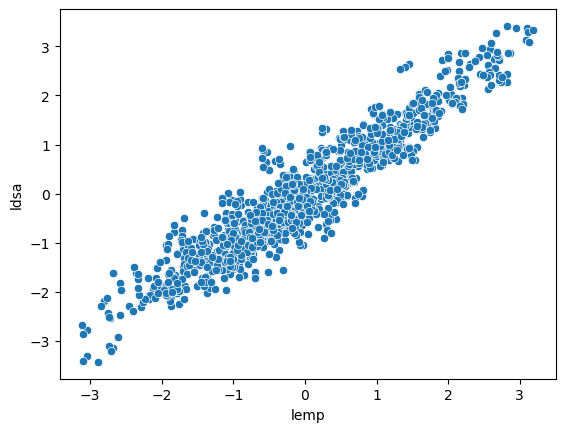

In [ ]:
sns.scatterplot(x='lemp', y='ldsa', data=dat); 

# Converting data to numpy format 

In [ ]:
dat.ldsa.values.shape

(1323,)

In [ ]:
N = dat.firmid.unique().size
T = dat.year.unique().size
assert dat.shape[0] == N*T, f'Error: data is not a balanced panel'
print(f'Data has N={N} and T={T}')

Data has N=441 and T=3


Extract data from `pandas` to `numpy` arrays. 

In [ ]:
y = dat.ldsa.values.reshape((N*T,1))

ones = np.ones((N*T,1))
l = dat.lemp.values.reshape((N*T,1))
k = dat.lcap.values.reshape((N*T,1))
X = np.hstack([ones, l, k])

xlbl = ["constant", "lcap", "lemp"]
ylbl = ["ldsa"]

**Pooled OLS**

In [ ]:
#Pooled OLS
estimation_POLS = lm.estimate(y, X, robust_se=True, T=T)
lm.print_table((ylbl, xlbl), estimation_POLS, title="POLS")